In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [25]:
data=pd.read_csv("auto-mpg.csv")
print(data.columns)
print(data.describe())

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')
              mpg   cylinders  displacement       weight  acceleration  \
count  399.000000  399.000000    399.000000   399.000000    399.000000   
mean    23.533333    5.451128    193.239348  2969.796992     15.577694   
std      7.815149    1.700426    104.205397   845.870145      2.760895   
min      9.000000    3.000000     68.000000  1613.000000      8.000000   
25%     17.500000    4.000000    104.500000  2224.500000     13.850000   
50%     23.000000    4.000000    146.000000  2800.000000     15.500000   
75%     29.000000    8.000000    262.000000  3607.000000     17.200000   
max     46.600000    8.000000    455.000000  5140.000000     24.800000   

       model year      origin  
count  399.000000  399.000000  
mean    76.025063    1.571429  
std      3.705133    0.801560  
min     70.000000    1.000000  
25%     73.000000    1.0

In [26]:

data = pd.read_csv("auto-mpg.csv")
noise={}
for i in data.select_dtypes(include='number').columns.values:
    data['z-scores']=(data[i]-data[i].mean())/(data[i].std())
    out=np.abs(data['z-scores'] > 3)
    if out.sum() >0:
        noise[i]=out.sum()
thresh=2.5
for i in noise:
    upper=data[i].mean()+thresh*data[i].std()
    lower=data[i].mean()-thresh*data[i].std()
    data=data[(data[i]>lower)&(data[i]<upper)]


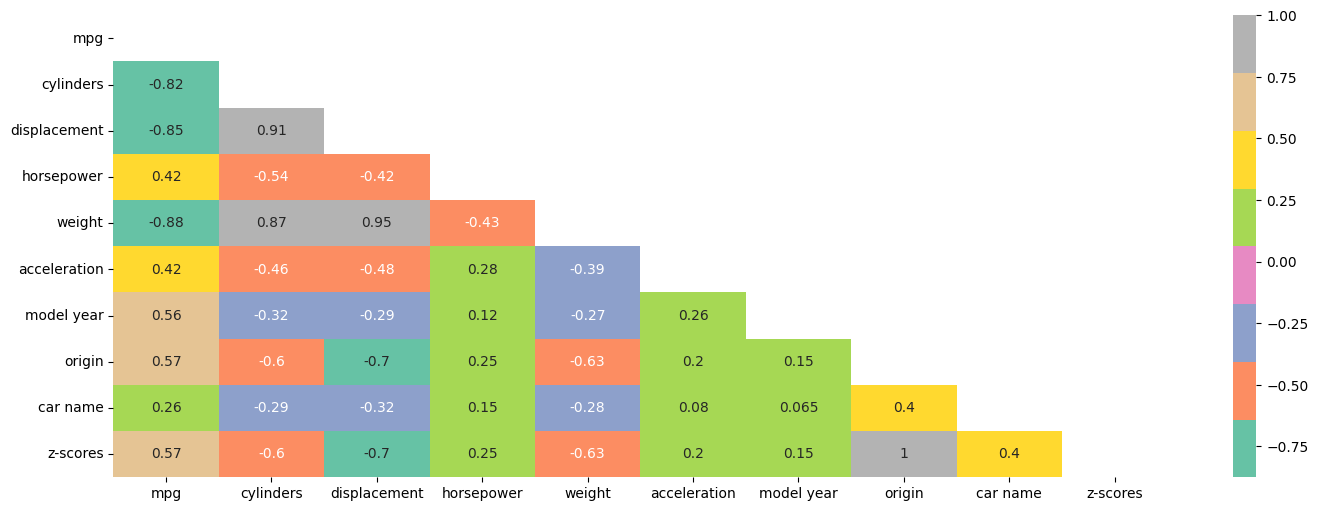

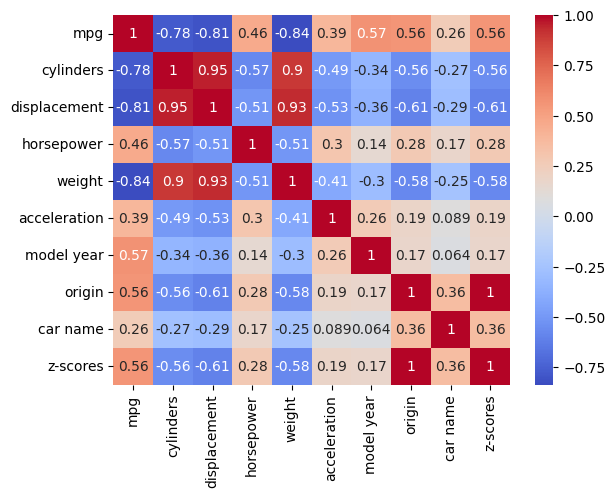

In [27]:
lab=LabelEncoder()
for i in data.select_dtypes(include="object").columns.values:
    data[i]=lab.fit_transform(data[i])
x=[]
corr=data.corr()['mpg']
corr=corr.drop(['mpg','z-scores'])
for i in corr.index:
    if corr[i] >0:
        x.append(i)
plt.figure(figsize=(17, 6))
corr = data.corr(method='spearman')
my_m = np.triu(corr)
sn.heatmap(corr, mask=my_m, annot=True, cmap="Set2")
plt.show()

correlation_matrix = data.corr()
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [28]:
columns_to_keep = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']
x = data[columns_to_keep]
y = data['mpg']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)
linear_reg_score = linear_reg.score(x_test, y_test)
print('Linear Regression Score:', linear_reg_score)

dtree_reg = DecisionTreeRegressor()
dtree_reg.fit(x_train, y_train)
dtree_reg_score = dtree_reg.score(x_test, y_test)
print('Decision Tree Regressor Score:', dtree_reg_score)



Linear Regression Score: 0.8545558201981085
Decision Tree Regressor Score: 0.6607554492266623


In [29]:
feature=[]
car = str(input("enter your car name:"))
cylinders=float(input("enter the cylinders of your car:"))
feature.append(cylinders)
displacement=float(input("enter the displacement of your car:"))
feature.append(displacement)
horsepower=float(input("enter the horsepower of your car:"))
feature.append(horsepower)
weight=float(input("enter the weighs of your car:"))
feature.append(weight)
acceleration=float(input("enter the acceleration of your car:"))
feature.append(acceleration)
modelyear=float(input("enter the modelyear of your car:"))
feature.append(modelyear)
origin=float(input("enter the origin of your car:"))
feature.append(origin)
print(feature)
features=[feature]
print(f"Mileage of {car} car Predicted using linear {linear_reg.predict(features)}")
print(f"Mileage of {car} car Predicted using Dtree {dtree_reg.predict(features)}")

enter your car name: BMW
enter the cylinders of your car: 8
enter the displacement of your car: 307
enter the horsepower of your car: 130
enter the weighs of your car: 3504
enter the acceleration of your car: 12
enter the modelyear of your car: 70
enter the origin of your car: 1


[8.0, 307.0, 130.0, 3504.0, 12.0, 70.0, 1.0]
Mileage of BMW car Predicted using linear [15.76829132]
Mileage of BMW car Predicted using Dtree [18.]


D:\deepfakepj\deepfake\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\deepfakepj\deepfake\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
